#### Carregando os modulos

In [1]:
import pandas as pd
from pathlib import Path
import converte as cv
import matplotlib.pyplot as plt
import calendar as cd
import matplotlib as mpl
import re


#### Definindo estilo Matplotlib

In [2]:
mpl.style.use('ggplot')
mpl.rcParams['font.family'] = ['Family1', 'Serif', 'cursive']
mpl.rcParams['font.size'] = 23
mpl.rcParams['figure.max_open_warning'] = 50

#### Limpando dados do kp

In [3]:
colunas = ['tempo',0, 3, 6, 9, 12, 15, 18, 21]
for ano in range(2001, 2020):
    caminho = f'dados/dados/kp_ap/kp{ano}.txt'
    df = pd.read_fwf(caminho, skiprows=0)
    mes_dia = [cd.monthrange(year=ano, month=i)[1] for i in range(1, 13)]
    q_dias_m = sum(mes_dia)
    #anos = [2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

    kp = df['Kp[8]           Sum'].str.split('', n=0, expand=True)

    df365 = []
    df365 = pd.DataFrame().T
    df365['tempo'] = pd.date_range(f'1/1/{ano}', periods=q_dias_m, freq='D')
    for num, simb, hora in zip(range(1, 16, 2), range(2, 17, 2), range(0, 22, 3)):
        df365[f'{hora}'] = kp[num]+kp[simb]
        

        
    df = pd.melt(df365, id_vars='tempo', var_name='hora', value_name='kp', ignore_index = True).sort_values('tempo')
    df.reset_index(inplace=True)
    df.drop(['tempo', 'index'], axis=1, inplace=True)
    df['hora'] = df.hora.astype(int)


    start1 = 0
    start2 = 8
    fim = len(df)
    while start2<=fim:
        df[start1:start2] = df[start1:start2].sort_values('hora', ascending=True)
        start1 = start2
        start2+=8
    df.set_index(pd.date_range(start=f'{ano}/1/1', periods=8*q_dias_m, freq='3h'), inplace=True)
    #df.drop('hora', axis=1, inplace=True)
    df['Kp_o'] = df['kp']
    for ki, kd in zip(cv.kp_in, cv.kp_deci):
        df['kp'].replace(ki, kd, inplace=True)
    df.kp.astype(float)
    df.to_string(f'dados/dados/kp_ap/kp{ano}_limpo.txt', index=True)
    df['kp'] = df.kp.astype(float)
    
    #df[2048:2048+72].plot(kind='bar', figsize=(19, 6), grid=True)

In [27]:
a = df.index.values
compile = re.compile('\d\d\d\d-\d\d-\d\d')
ano = '2005-03-01'
print(compile.findall(ano))

['2005-03-01']


#### Plotando dados das 50 maiores tempestades

In [88]:
df2 = pd.read_csv('dados/tempestades_kp_decimais.txt', delimiter='\s+')
df2.drop(['Ap', 'Kp_Max_dia'],axis=1, inplace=True)
df2.columns=colunas

In [69]:
df3 = pd.melt(df2, id_vars='tempo', var_name='hora', value_name='kp', ignore_index = True).sort_values('tempo')
start1 = 0
start2 = 8
fim = len(df)
while start2<=fim:
    df3[start1:start2] = df3[start1:start2].sort_values('hora', ascending=True)
    start1 = start2
    start2+=8
df3.reset_index(inplace=True)
df3.drop('index', axis=1, inplace=True)


In [11]:
df.index.values

array([   0,    1,    2, ..., 2917, 2918, 2919])

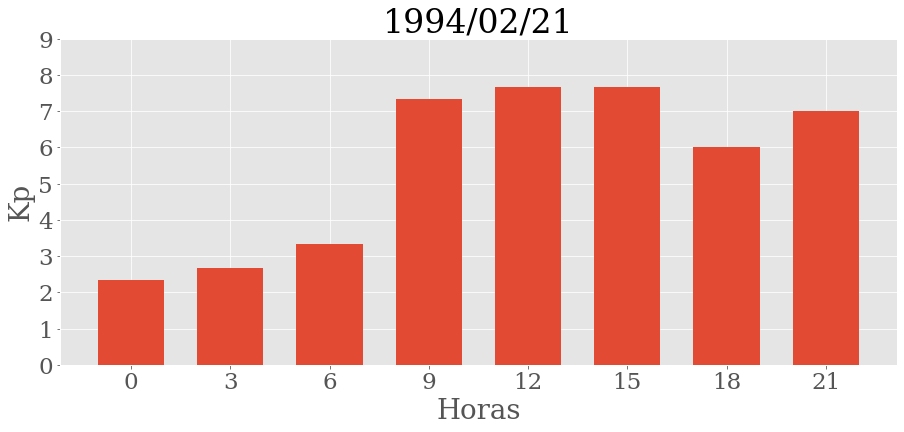

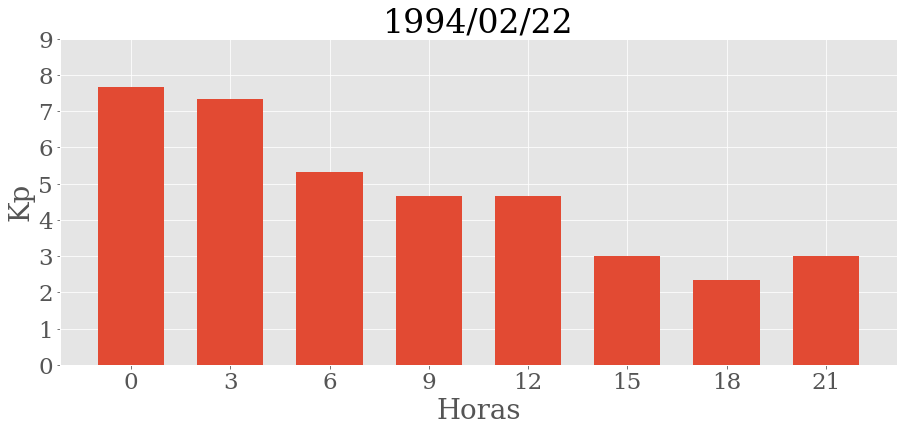

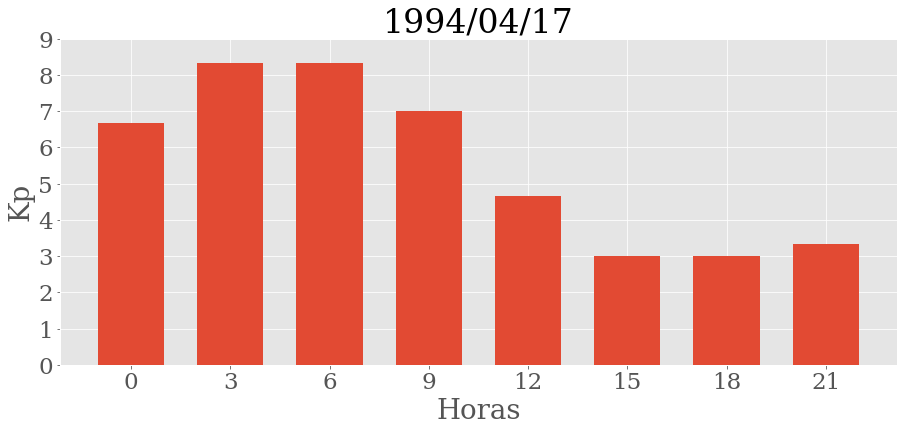

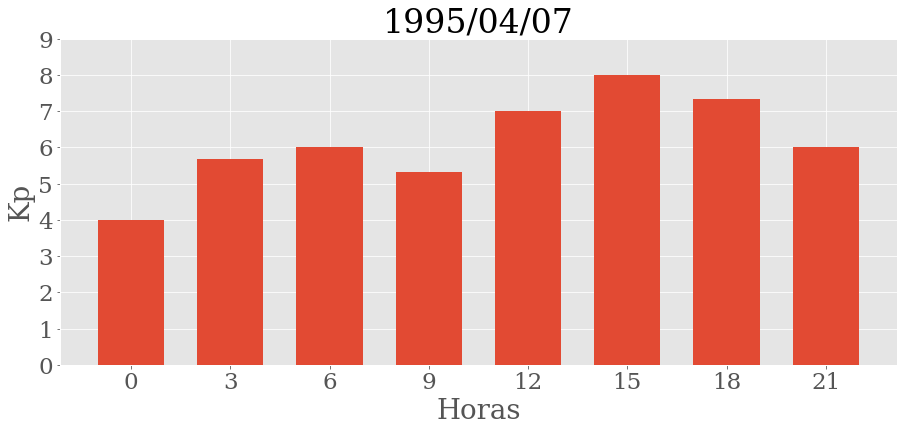

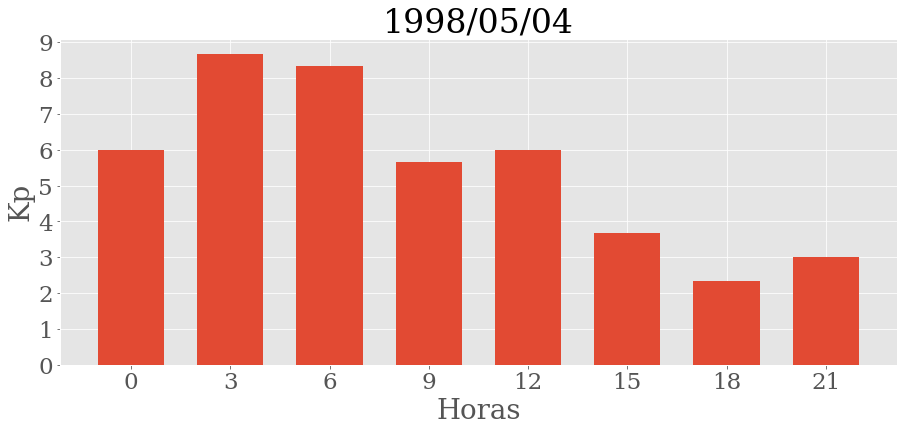

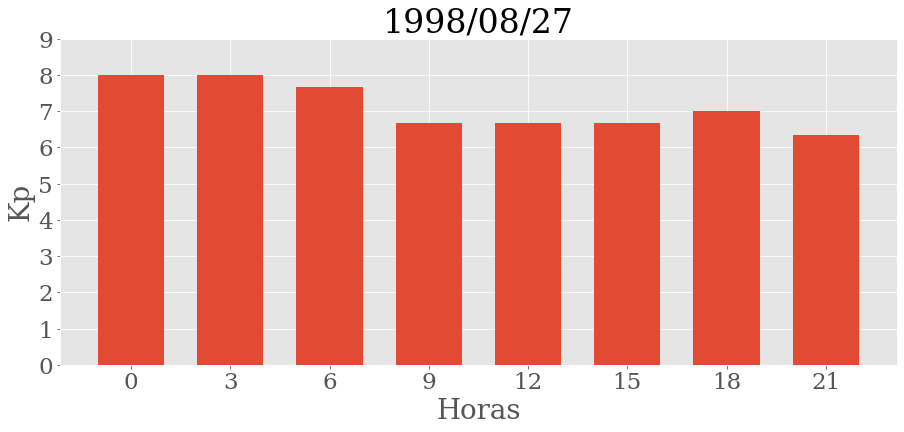

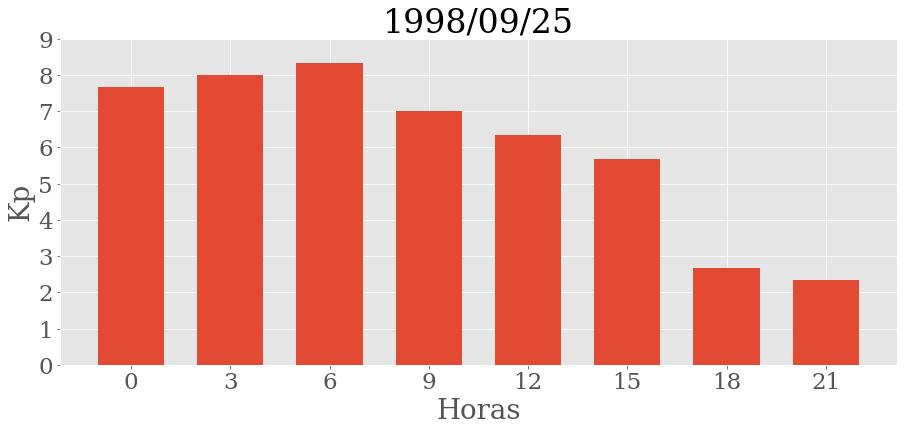

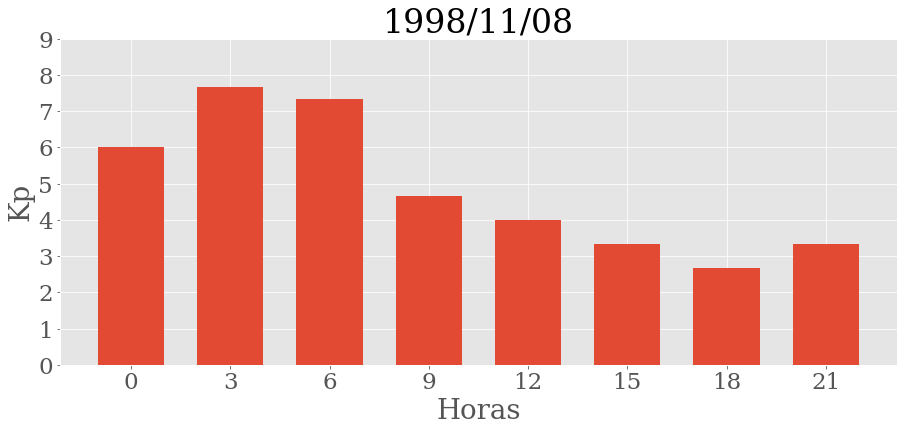

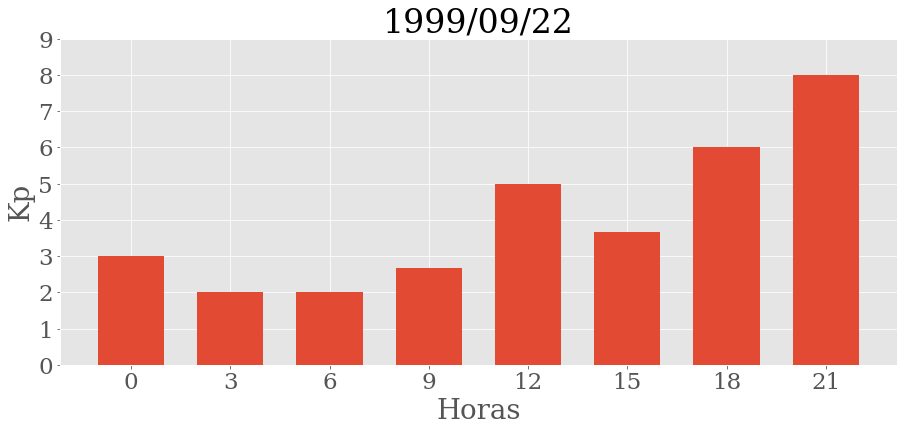

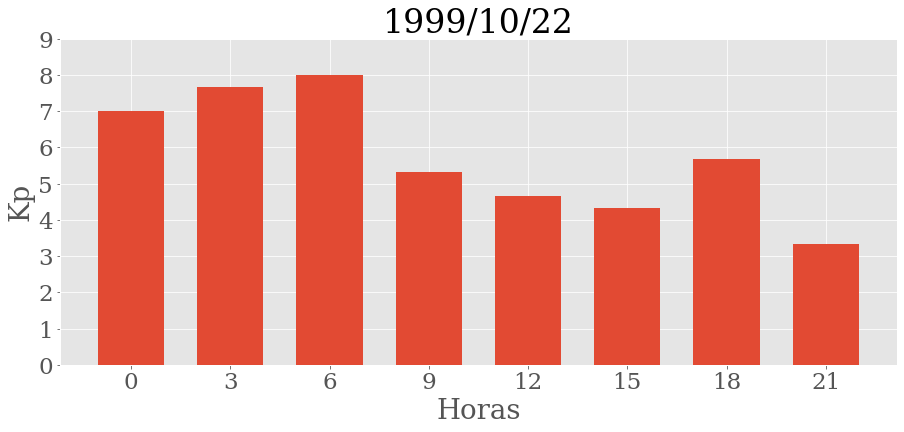

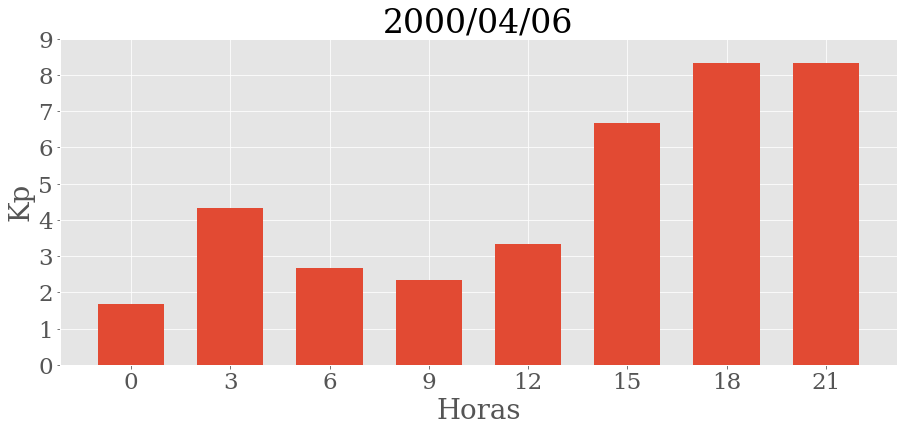

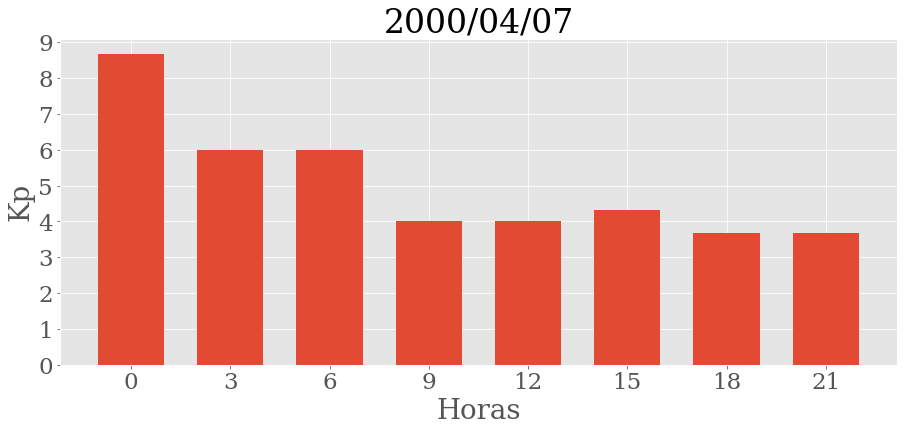

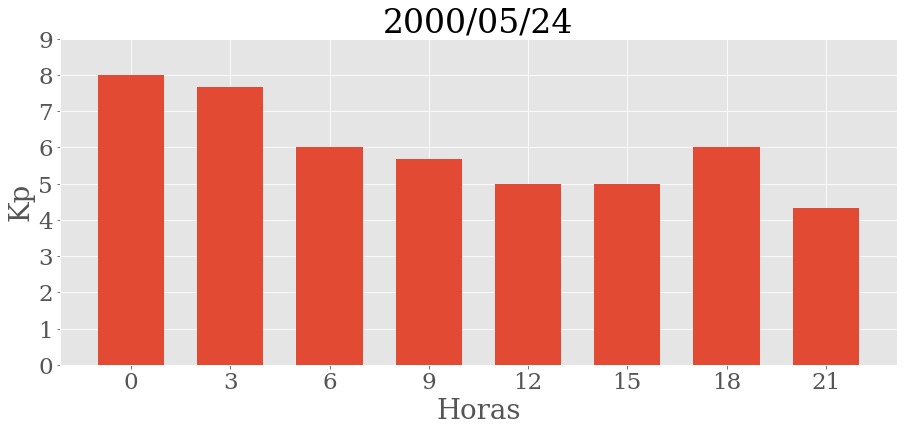

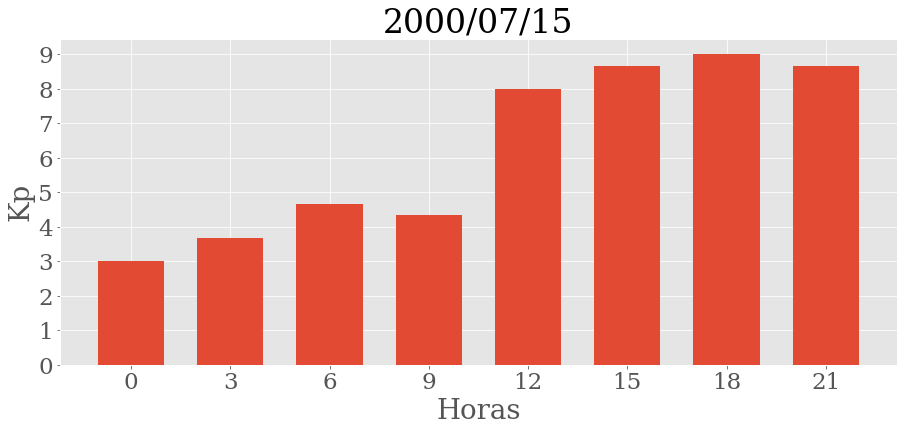

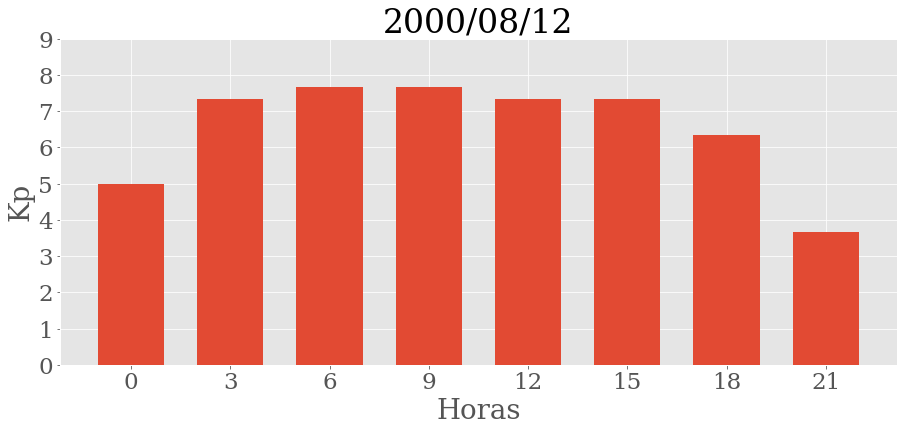

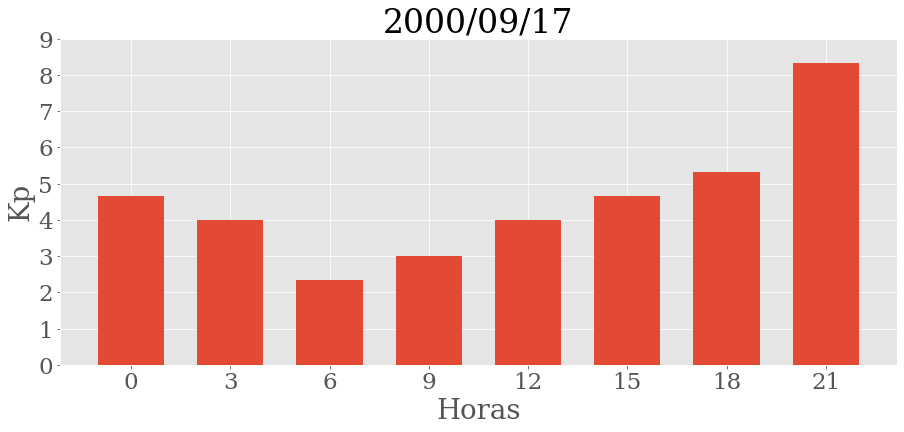

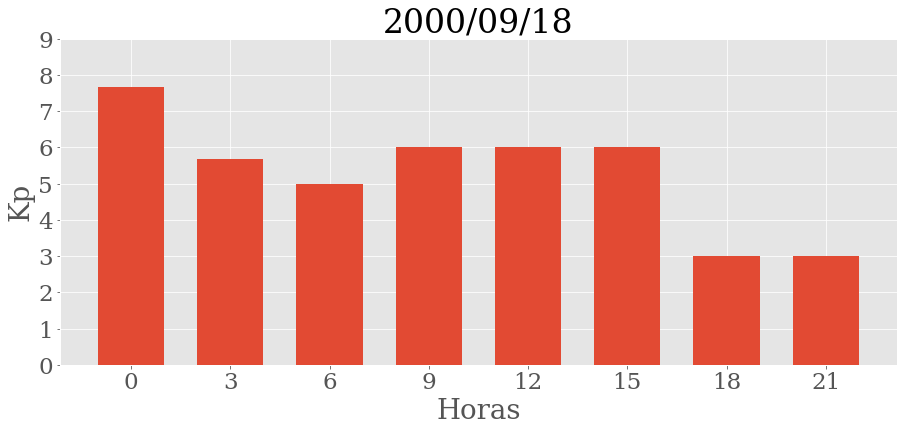

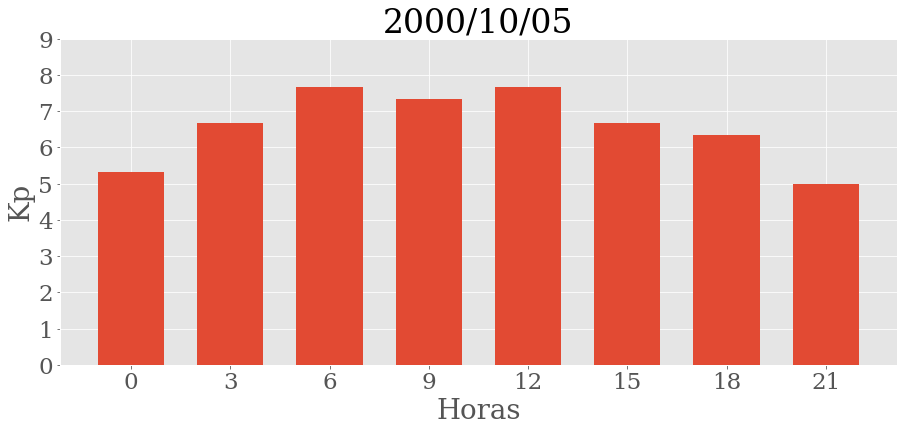

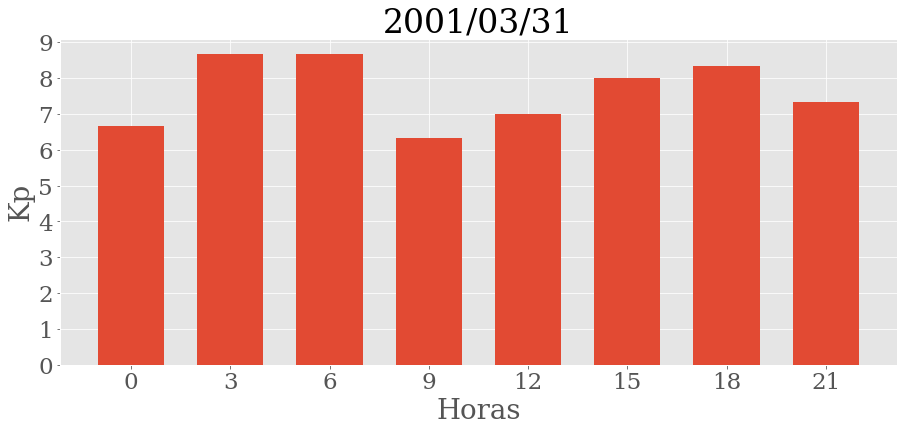

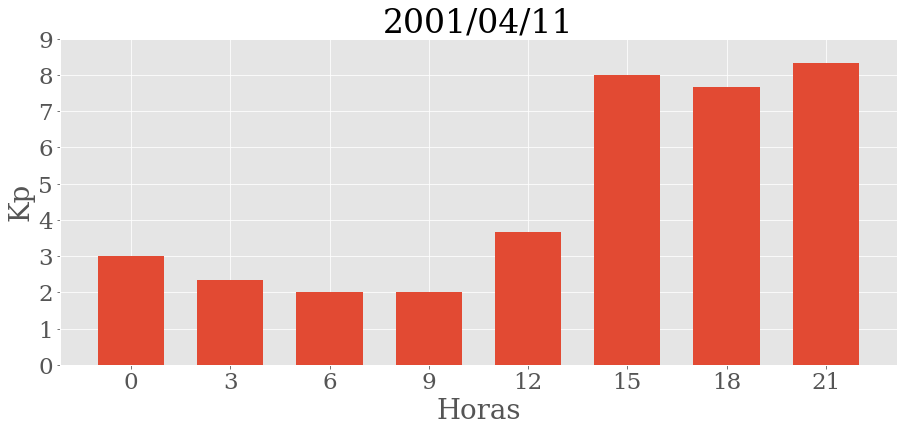

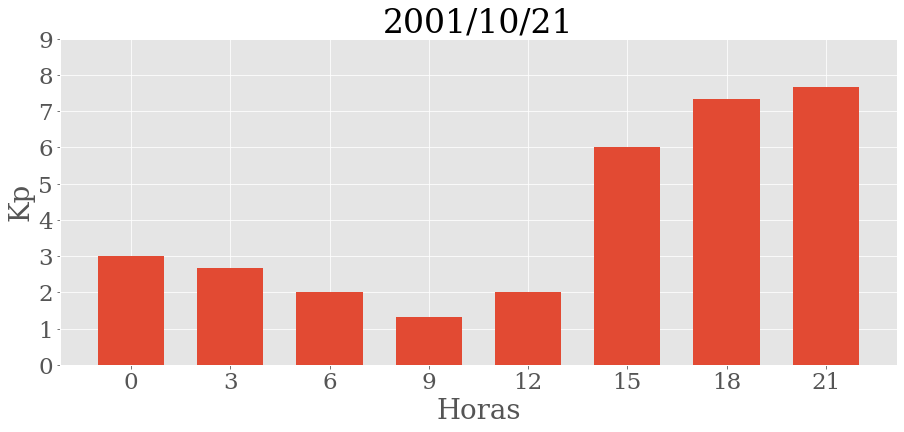

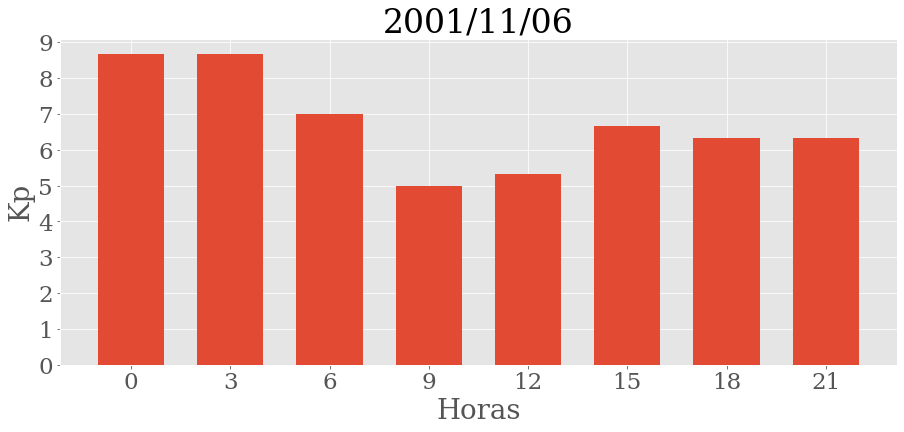

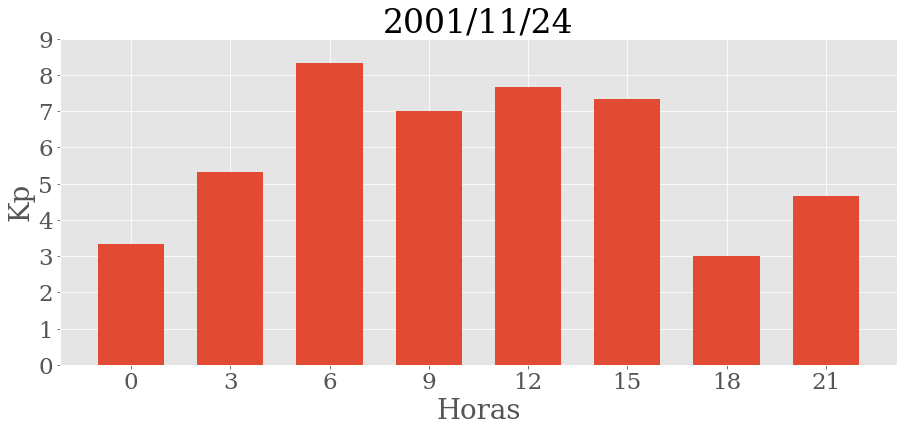

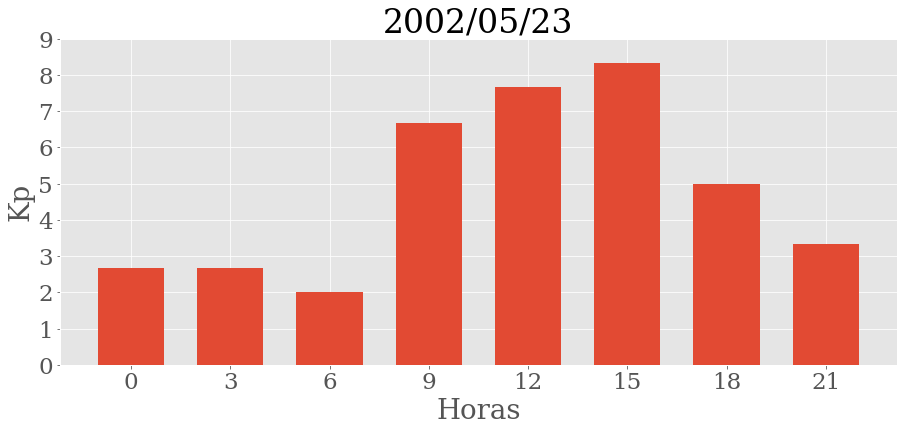

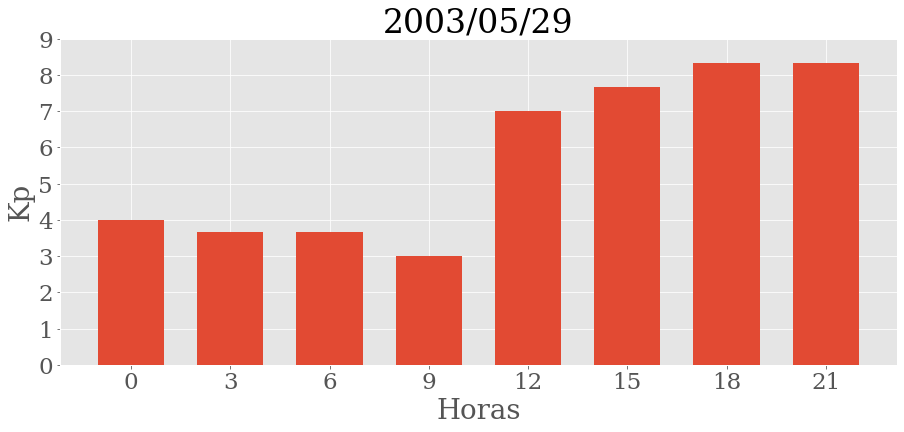

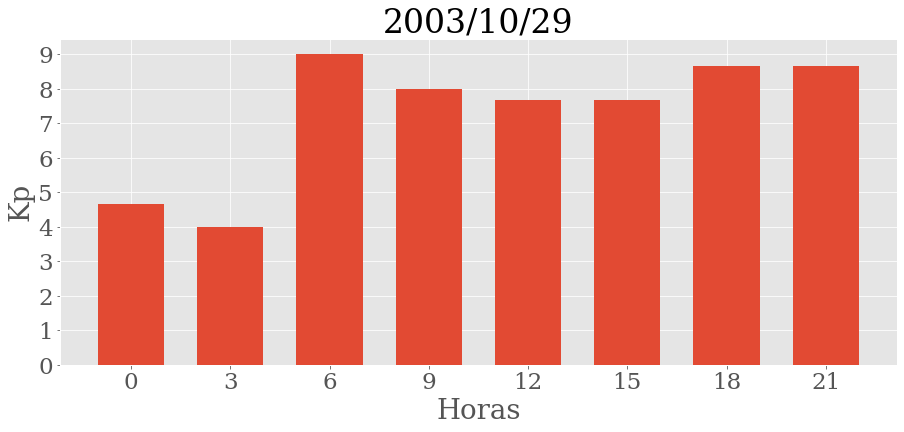

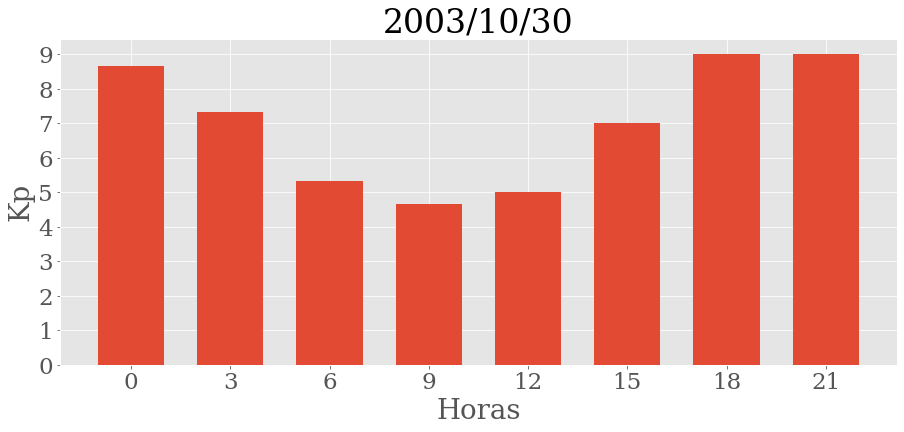

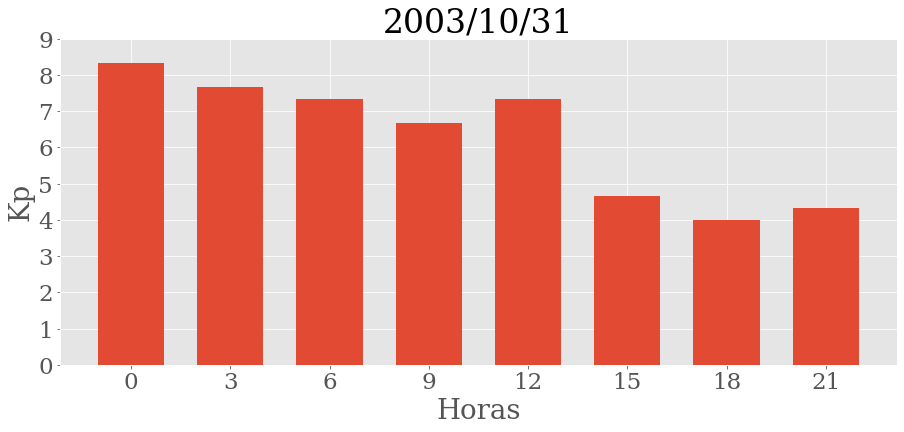

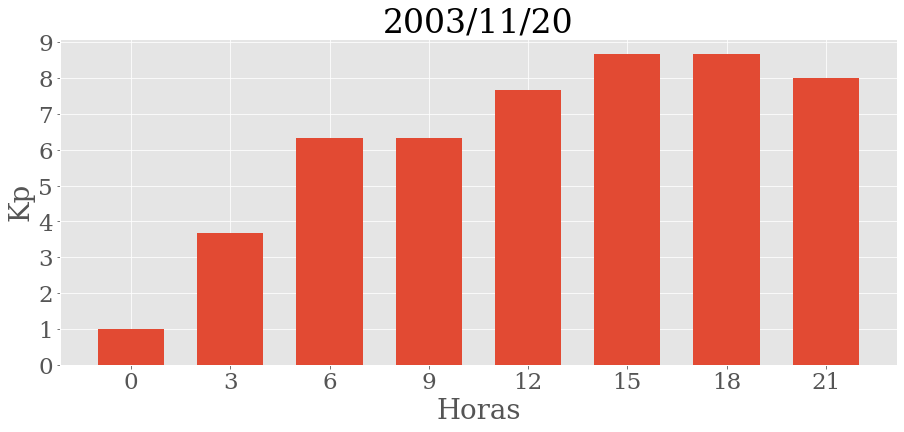

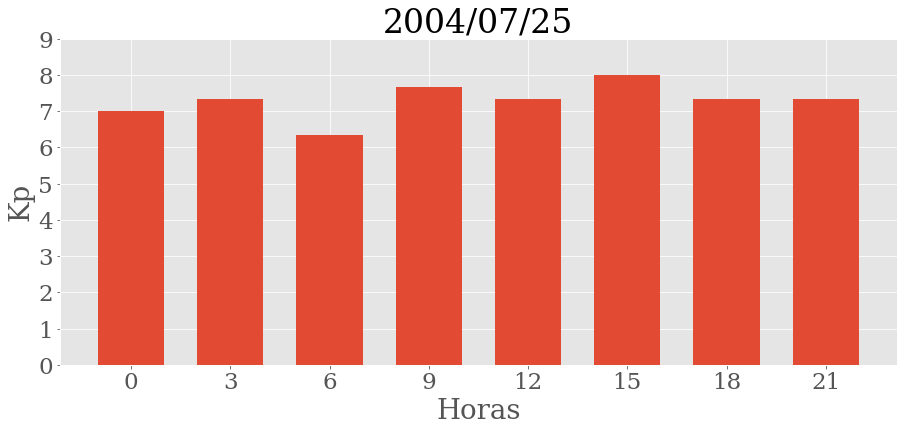

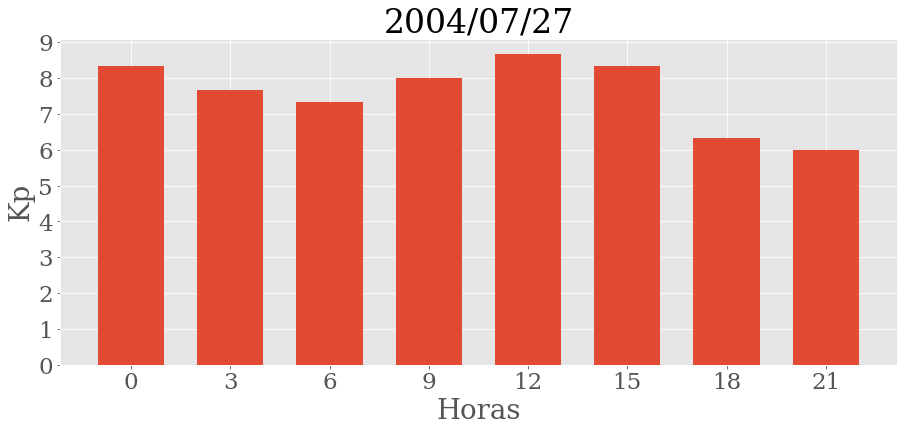

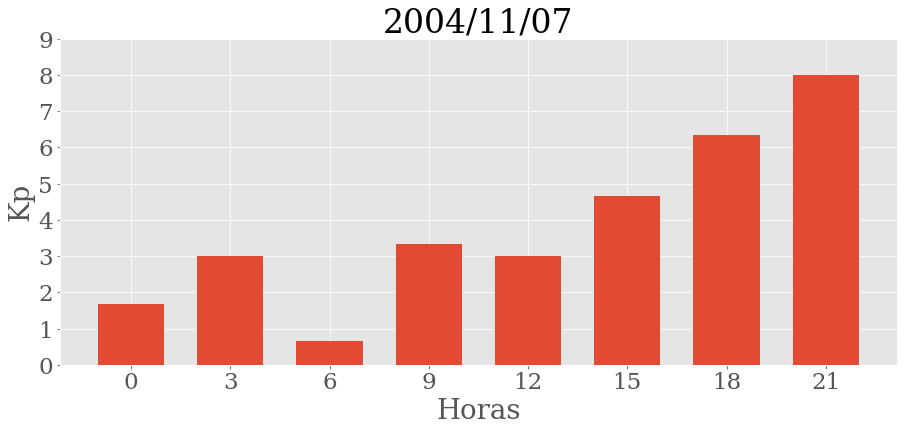

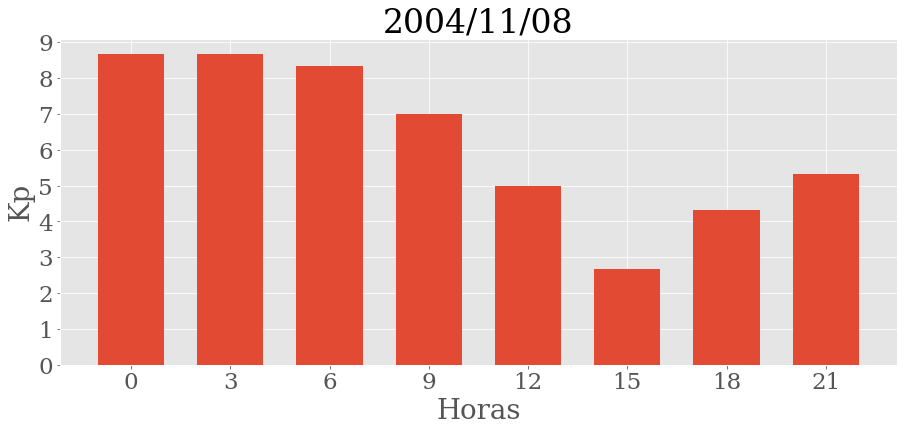

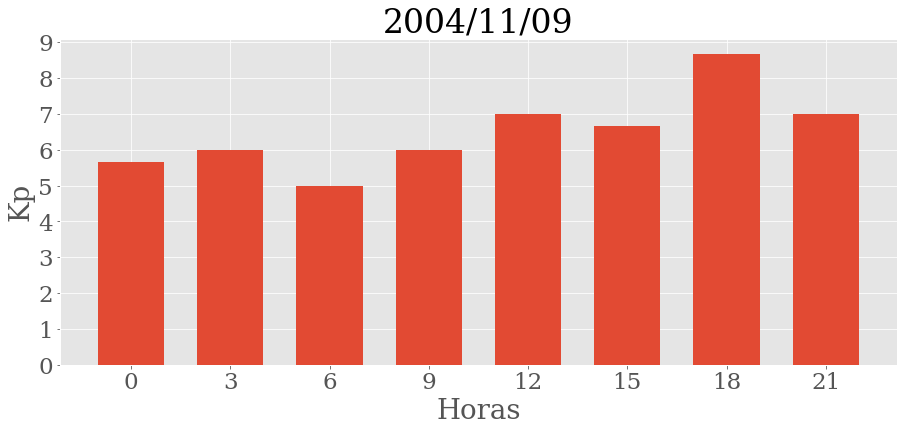

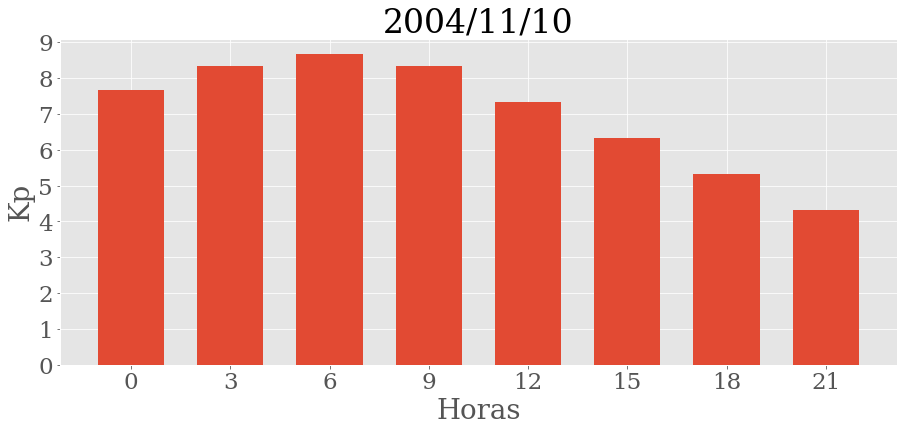

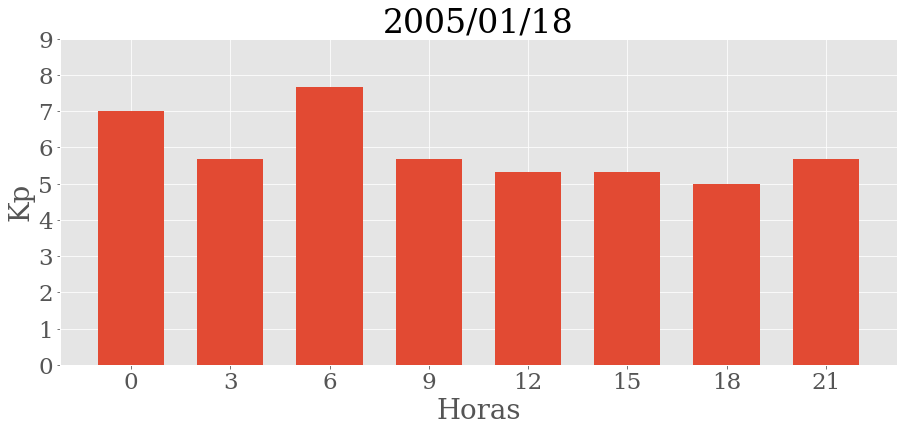

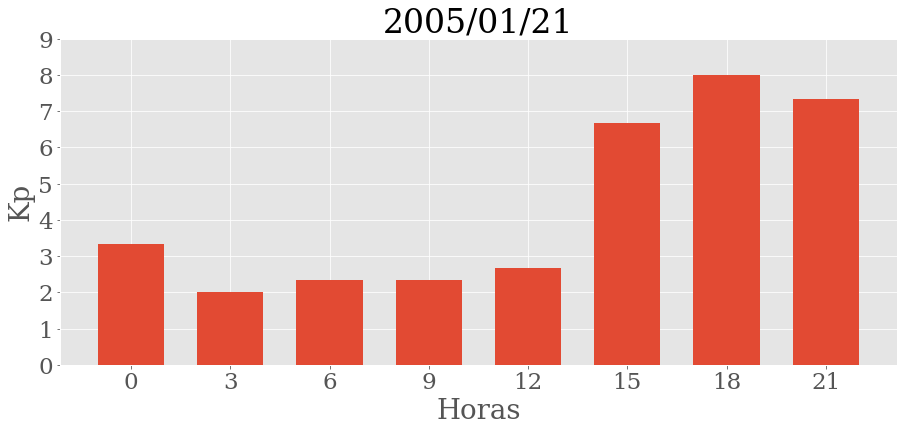

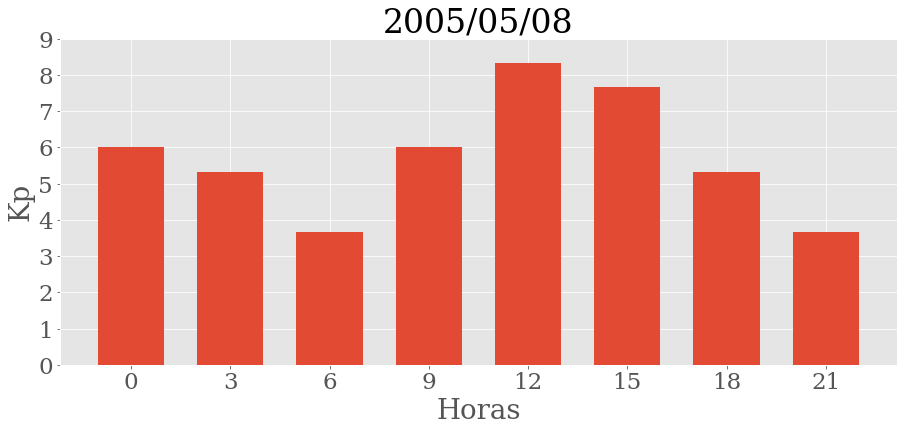

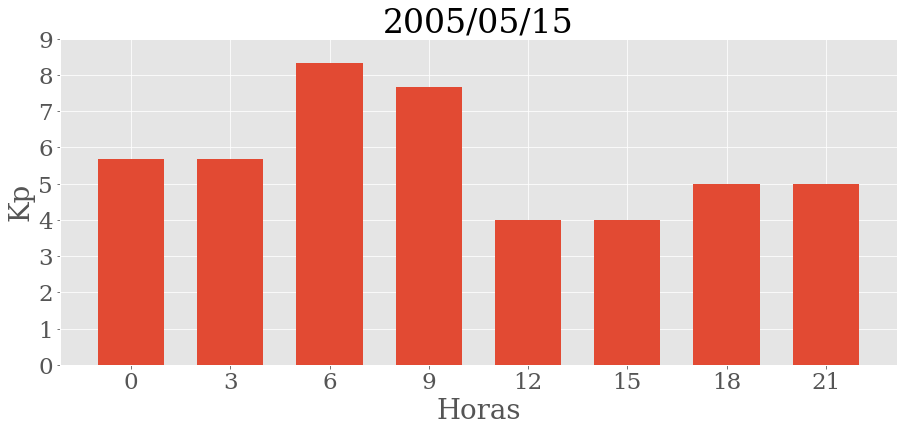

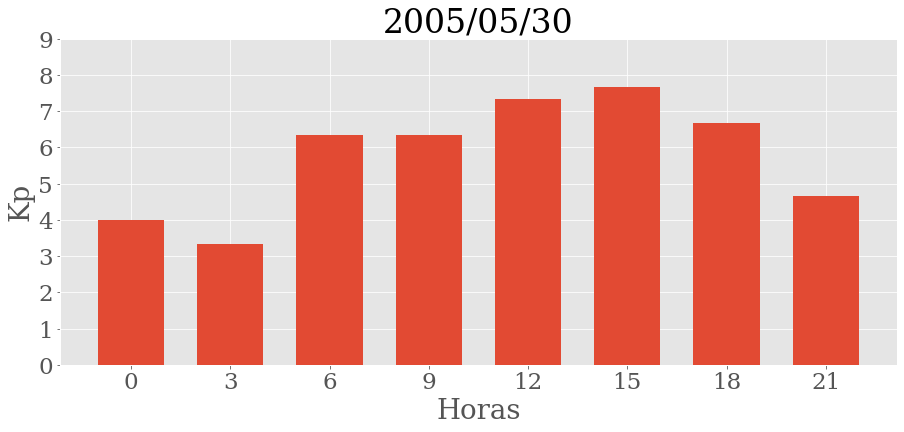

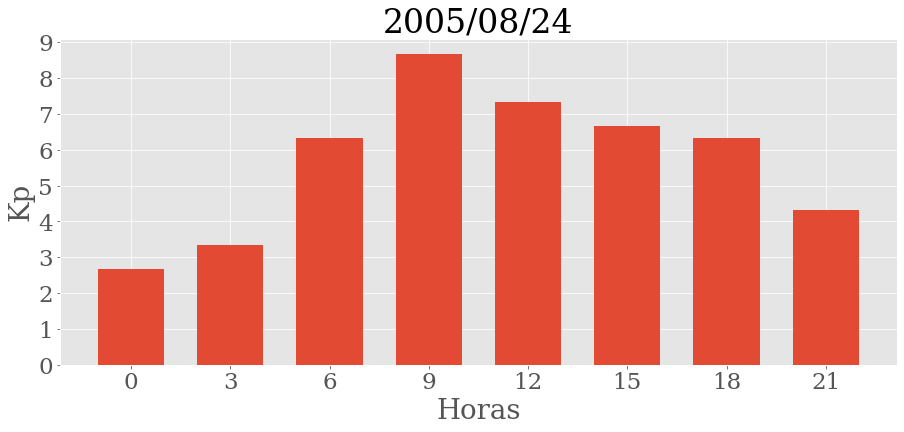

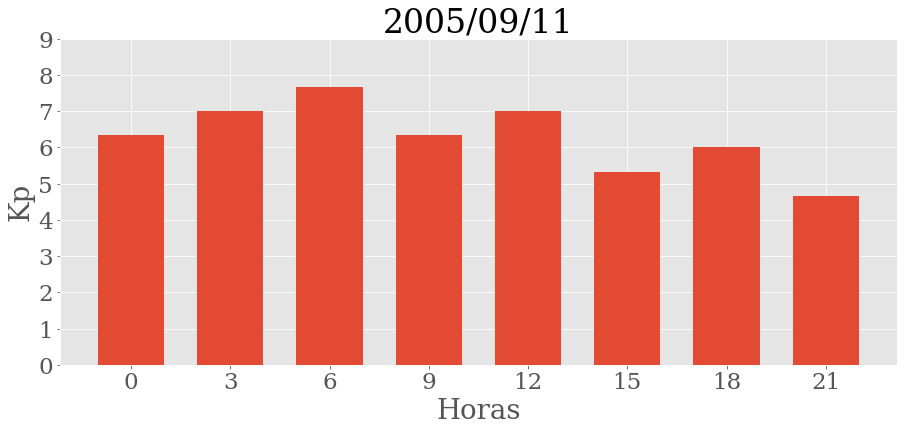

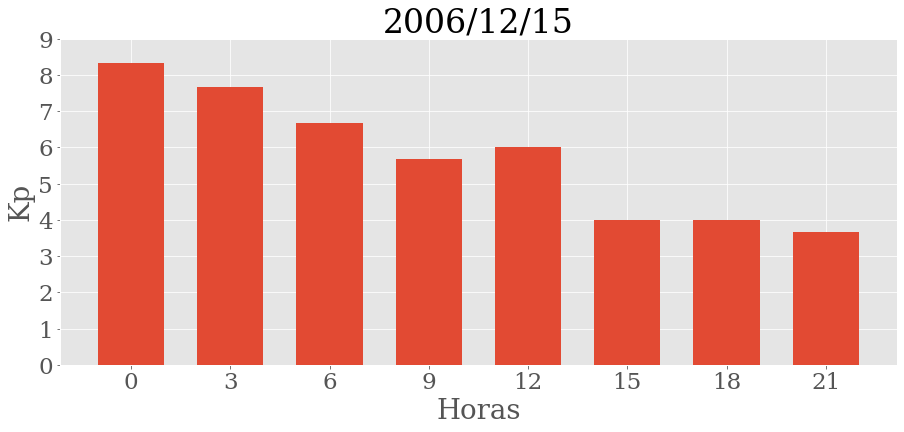

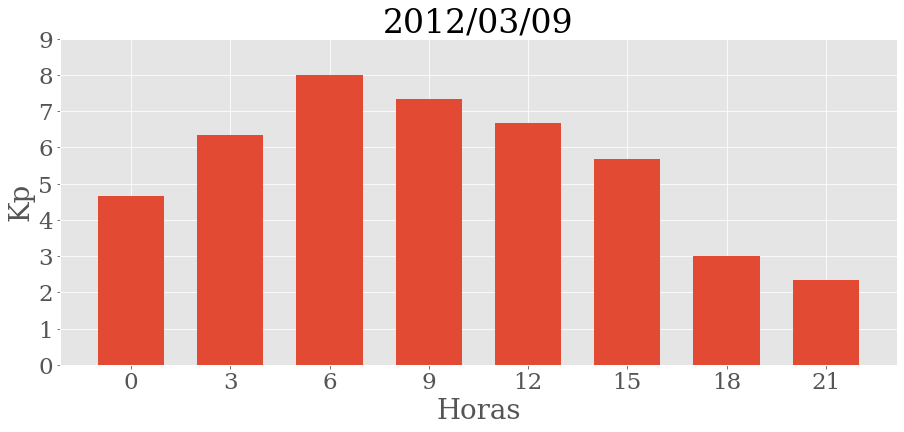

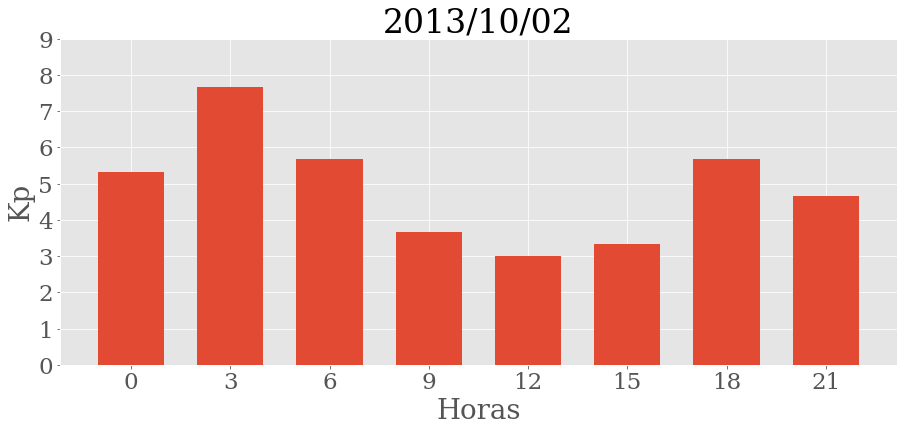

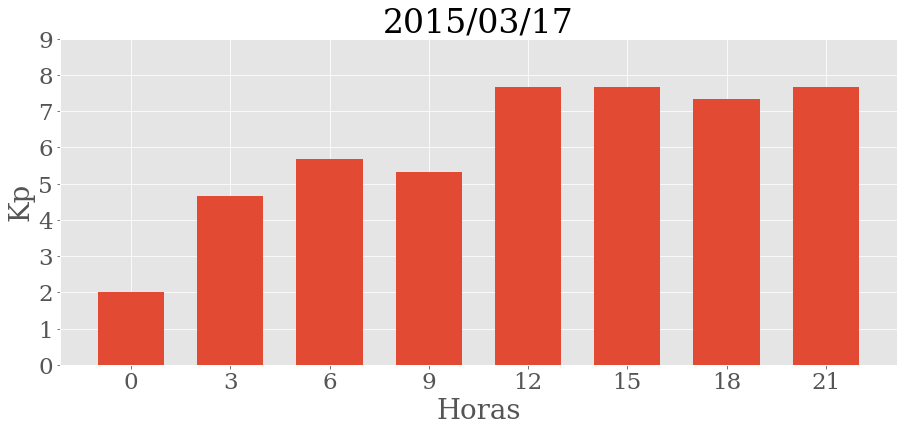

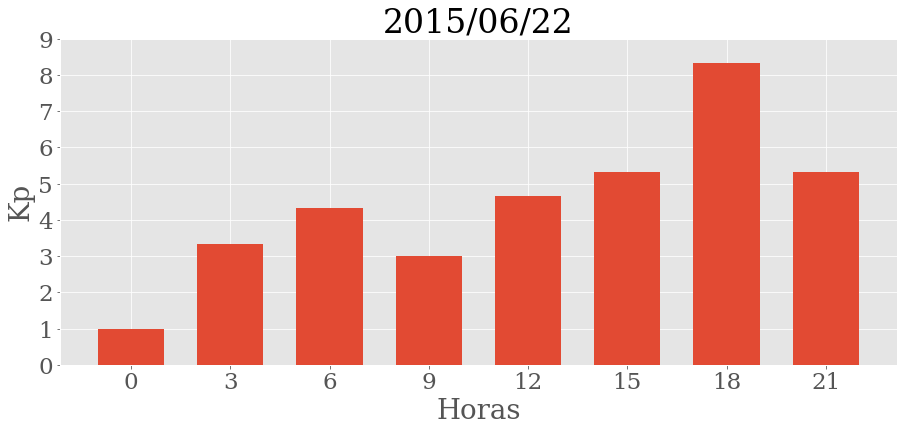

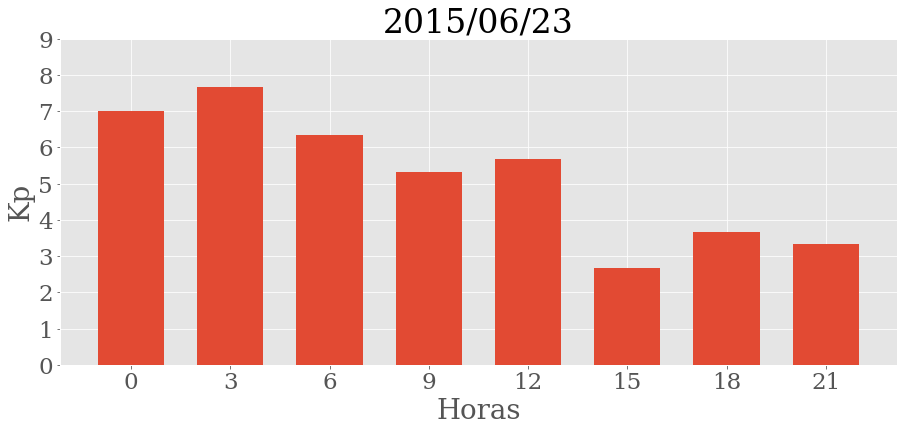

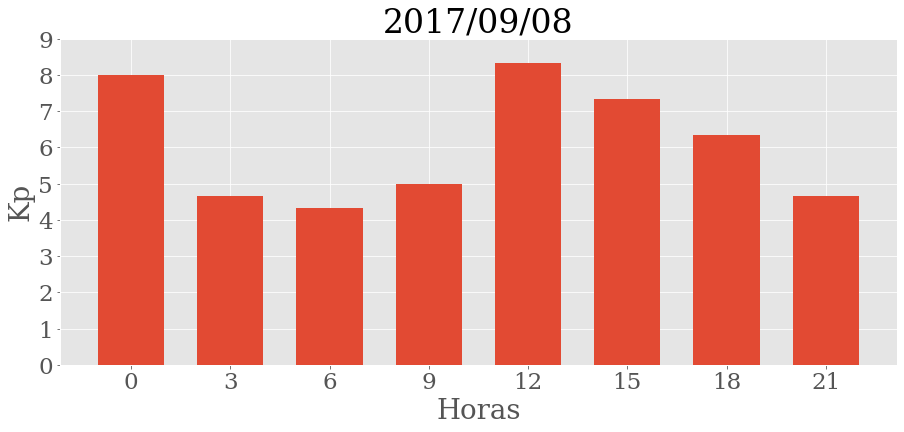

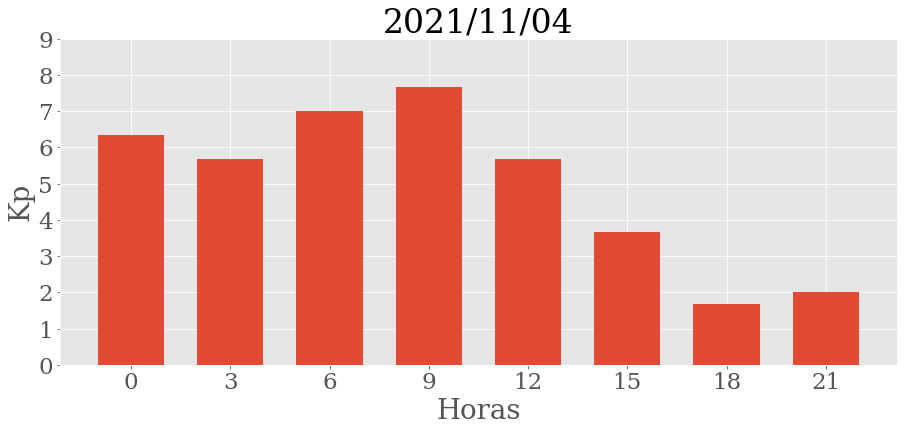

In [111]:
start1 = 0
start2 = 8
fim = len(df)
while start2<=fim:
    fig=plt.figure(figsize=(15, 6))
    bar = df3[start1:start2]
    legenda = bar['tempo'][:start2][:1]
    plt.bar(x=bar['hora'], height=bar['kp'], width=2)
    plt.title(''.join(legenda.values))
    plt.xticks(colunas[1:])
    plt.xlabel('Horas')
    plt.ylabel('Kp')
    plt.yticks(range(0, 10))
    start1 = start2
    start2+=8
    fig.savefig(f'imegens/50_tempestades/{"".join(legenda.values).replace("/", "-")}')

[Timestamp('2019-01-01 00:00:00', freq='3H'),
 Timestamp('2019-01-01 03:00:00', freq='3H'),
 Timestamp('2019-01-01 06:00:00', freq='3H'),
 Timestamp('2019-01-01 09:00:00', freq='3H'),
 Timestamp('2019-01-01 12:00:00', freq='3H'),
 Timestamp('2019-01-01 15:00:00', freq='3H'),
 Timestamp('2019-01-01 18:00:00', freq='3H'),
 Timestamp('2019-01-01 21:00:00', freq='3H'),
 Timestamp('2019-01-02 00:00:00', freq='3H'),
 Timestamp('2019-01-02 03:00:00', freq='3H'),
 Timestamp('2019-01-02 06:00:00', freq='3H'),
 Timestamp('2019-01-02 09:00:00', freq='3H'),
 Timestamp('2019-01-02 12:00:00', freq='3H'),
 Timestamp('2019-01-02 15:00:00', freq='3H'),
 Timestamp('2019-01-02 18:00:00', freq='3H'),
 Timestamp('2019-01-02 21:00:00', freq='3H'),
 Timestamp('2019-01-03 00:00:00', freq='3H'),
 Timestamp('2019-01-03 03:00:00', freq='3H'),
 Timestamp('2019-01-03 06:00:00', freq='3H'),
 Timestamp('2019-01-03 09:00:00', freq='3H'),
 Timestamp('2019-01-03 12:00:00', freq='3H'),
 Timestamp('2019-01-03 15:00:00', 